# 2장 : 퍼셉트론

이번 장에서는 $\scriptsize \textbf{퍼셉트론}^{\text{perceptron}}$알고리즘을 설명한다. 퍼셉트론은 $\scriptsize\text{프랑크 로젠블라트}^{Frank Rosenblatt}$가 1957년에 고안한 알고리즘이다. 고대 화석같은 이 알고리즘을 왜 배우느냐? 퍼셉트론이 신경망(딥러닝)의 기원이 되는 알고리즘이기 때문이다. 그래서 퍼셉트론의 구조를 배우는 과정 속에서 신경망과 딥러닝으로 나아가는 데 중요한 아이디어를 배울 수 있는 것이다.    

이번 장에서는 퍼셉트론을 설명하고 퍼셉트론을 써서 간단한 문제를 풀어갈 것이다. 여정의 첫 목적지인 만큼 가볍고 즐거운 여행이 될 것이다.

## 2.1 퍼셉트론이란?
퍼셉트론은 다수의 신호를 입력으로 받아 하나의 신호를 출력한다. 여기서 말하는 $\scriptsize \textbf{신호}$란 전류나 강물처럼 $\scriptsize \textbf{흐름}$이 있는 것을 상상하면 좋다. 전류가 전선을 타고 흐르는 전자를 내보내듯이, 퍼셉트론 신호도 흐름을 만들고 정보를 앞으로 전달한다. 다만, 실제 전류와 달리 퍼셉트론 신호는 '흐른다/ 안 흐른다(1 혹은 0)'의 두 가지 값을 가질 수 있다. 이 책에서는 1을 '신호가 흐른다', 0을 '신호가 흐르지 않는다'라는 의미로 쓰도록 하자.

In [13]:
from PIL import Image

#### [그림2-1] 입력이 2개인 퍼셉트론

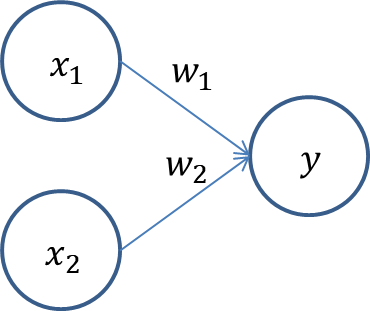

In [14]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\밑바닥부터 시작하는 딥러닝1\\밑시딥1 - 2장\\images\\fig 2-1.png")

[그림2-1]은 입력으로 2개의 신호를 받은 퍼셉트론의 예이다. $x_1$과 $x_2$는 입력 신호, $y$는 출력 신호, $w_1$과 $w_2$ 는 가중치를 뜻한다. ( $w$는 weight의 머리글자이다.) 그림의 원을 $\scriptsize \textbf{뉴런}$혹은 $\scriptsize \textbf{노드}$라고 부른다. 입력 신호가 뉴런에 보내질 때는 각각 고유한 $\scriptsize \textbf{가중치}$가 곱해진다. ( $w_1 x_1, w_2 x_2$ ) 뉴런에서 보내온 신호의 총합이 정해진 한계를 넘어설 때만 1을 출력한다. (이를 '뉴런이 활성화한다' 라고 표현하기도 한다.) 이 책에서는 그 한계를 $\scriptsize \textbf{임계값}$이라 하며, $\theta$로 나타낸다.

퍼셉트론의 동작 원리는 이게 전부이다! 이상을 수식으로 나타내면 [식 2.1]이 된다.

\begin{equation}
    y =
    \begin{cases}
        0 ~~~(w_{1}x_1 + w_2 x_2 \leq \theta) \\
        1 ~~~(w_{1}x_1 + w_2 x_2 > \theta)
    \end{cases}
\end{equation} \tag{2.1}

퍼셉트론은 복수의 입력 신호 각각에 고유한 가중치를 부여한다. 가중치는 각 신호가 결과에 주는 영향력을 조절하는 요소로 작용한다. 즉, 가중치가 클수록 해당 신호가 그만큼 더 중요함을 뜻한다.   

예를 들어 $w_1$이 $w_2$보다 크면 $x_1$신호가 $x_2$신호보다 결과 $y$에 영향력을 더 많이 행사한다고 볼 수 있다. 아마 이러한 점 때문에 어떤 연구자들은 이러한 뉴런자체가 의미를 가지는게 아닐까하고 관련 연구를 하는 것 같기도 하다. 예를 들어서 베이즈 신경망의 경우 이러한 가중치(뉴런) 하나하나가 확률변수라라는 가정으로 시작해서 학습 과정에서 이러한 가중치에 대한 사후 확률 분포를 추정하게 된다. 이를 통해 가중치에 대한 베이즈 추론으로 이어지게 되는 것이다. 이러한 방식은 딥러닝 모형의 불확실성을 정량화하는데 중요한 역할을 한다. 



$\textbf{NOTE}$     
가중치는 전류에서 말하는 $\scriptsize \textbf{뉴런}$ 에 해당한다. 저항은 전류의 흐름을 억제하는 매개변수로, 저항이 낮을수록 큰 전류가 흐르게 된다. 한편 퍼셉트론의 가중치는 그 값이 클수록 강한 신호를 흘려보낸다. 이처럼 서로 작용하는 방향은 반대지만, 신호가 얼마나 잘(혹은 어렵게) 흐르는가를 통제한다는 점에서 저항과 가중치는 같은 기능을 한다.

## 2.2 단순한 논리 회로

### 2.2.1 AND 게이트
그럼 퍼셉트론을 활용한 간단한 문제를 살펴보도록 하자. 논리 회로를 알아보는 첫걸음으로 AND 게이트를 살펴보자. AND 게이트는 입력이 둘이고 출력은 하나이다. [그림2-2]와 같은 입력 신호와 출력 신호의 대응 표를 $\scriptsize \textbf{진리표}$라고 한다. 이 그림은 AND 게이트의 진리표로, 두 입력이 모두 1일 때만 1을 출력하고, 그 외에는 0을 출력한다.

#### [그림2-2] AND 게이트의 진리표

| x1 | x2 | x3 |
|----|----|----|
|  0 |  0 |  0 |
|  1 |  0 |  0 |
|  0 |  1 |  0 |
|  1 |  1 |  1 |

이 AND 게이트를 퍼셉트론으로 표현하고자 한다. 이를 위해 할 일은 [그림2-2]의 진리표대로 작동하도록 하는 $w_1,w_2,\theta$의 값을 정하는 것이다. 그럼 어떤 값으로 설정하면 [그림2-2]의 조건을 충족하는 퍼셉트론이 만들어질까?  

사실 [그림2-2]를 만족하는 매개변수 조합은 무한히 많다. 가령 $(w_1, w_2, \theta)$가 $(0.5,0.5,0.7)$일 때, 또 $(0.5,0.5,0.8)$이나 $(1.0,1.0,1.0)$ 때 모두 AND 게이트의 조건을 만족한다. 매개변수를 이렇게 설정하면 $x_1$과 $x_2$모두가 1일 때만 가중 신호의 총합이 주어진 임계값을 웃돌게 된다.

### 2.2.2 NAND 게이트와 OR 게이트
이어서 NAND 게이트를 살펴보도록 하자. NAND는 Not AND를 의미하며, 그 동작은 AND게이트의 출력을 뒤집은 것이 된다. 진리표로 나타내면 [그림2-3]처럼 $x_1$과 $x_2$가 모두 1일 때만 0을 출력하고, 그 외에는 1을 출력한다. 그럼 이러한 경우는 매개변수 값들을 어떻게 조합해야 NAND 게이트가 만들어질까?

#### [그림2-3] NAND 게이트의 진리표

| x1 | x2 | x3 |
|----|----|----|
|  0 |  0 |  1 |
|  1 |  0 |  1 |
|  0 |  1 |  1 |
|  1 |  1 |  0 |

NAND 게이트를 표현하는 가능한 조합중에는 예를 들어 $(w_1,w_2,\theta) = (-0.5,-0.5,-0.7)$ 조합이 있다. (물론 이외에도 무수히 많은 가능한 조합이 존재한다.) 사실 AND 게이트를 구현하는 매개변수의 부호를 모두 반전하기만 하면 NAND 게이트가 된다.     

같은 흐름에서 [그림2-4]의 OR 게이트도 생각해보자. OR 게이트는 입력 신호 중 하나 이상이 1이면 출력이 1이 되는 논리 회로이다. 예를 들어 $(w_1,w_2,\theta) = (0.5,0.5,0.4)$ 조합이 있다.

#### [그림2-4] OR 게이트의 진리표

| x1 | x2 | x3 |
|----|----|----|
|  0 |  0 |  0 |
|  1 |  0 |  1 |
|  0 |  1 |  1 |
|  1 |  1 |  1 |

$\textbf{NOTE}$     
여기서 퍼셉트론의 매개변수 값을 정하는 것은 컴퓨터가 아니라 우리 인간이다. 인간이 직접 진리표라는 '학습 데이터'를 보면서 매개변수의 값을 생각한다. 기계학습 문제는 이 매개변수의 값을 정하는 작업을 컴퓨터가 자동을 하도록 한다. $\scriptsize \textbf{학습}$이란 적절한 매개변수 값을 정하는 작업이며, 사람은 퍼셉트론의 구조(모델)를 고민하고 컴퓨터에 학습할 데이터를 주는 일을 한다.     

이러한 매개변수 값을 정하는 작업을 기계(Machine)가 마치 사람이 문제를 풀면서 오답률을 낮춰가면서 학습(Learning)하는 것처럼 하기에 기계 학습(Machine Learning)이라고 부른다. Andrew Ng(Coursera Co-founder)은 이전에는 사람에 의한 오류(human error)에 근접하기만 해도 성공적인 기계 학습 알고리즘이라고 보았으나, 요즘에 이르러서는 딥러닝에 기반한 기계 학습 알고리즘의 경우 사람에 의한 오류를 뛰어넘어, 최적의 오류(Bayes error)에 근접하는 경우가 많다. 더 나아가 Chat-gpt와 같은 생성형 AI(Generative Artificial Intelligence)의 경우 이미지 생성, 동영상 생성, 텍스트 생성등 아예 다른 레벨의 작업이 가능하다.

이상과 같이 퍼셉트론으로 AND, NAND, OR 논리 회로를 표현할 수 있음을 알았다. 여기서 중요한 점은 퍼셉트론의 구조는 AND, NAND, OR 게이트 모두에서 똑같다는 것이다. 세 가지 게이트에서 다른 것은 매개변수(가중치와 임계값)의 값뿐이다. 즉, 마치 팔색조 배우가 다양한 인물을 연기하는 것처럼 똑같은 구조의 퍼셉트론이 매개변수의 값만 적절히 조정하여 AND, NAND, OR로 변신하는 것이다.

## 2.3 퍼셉트론 구현하기

### 2.3.1 간단한 구현부터
이제 논리 회로를 파이썬으로 구현해보도록 하자. 다음은 x1과 x2를 인수로 받는 AND라는 함수이다.

In [15]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

매개변수 w1,w2,theta 는 함수 안에서 초기화되고, 가중치를 곱한 입력의 총합이 임계값을 넘으면 1을 반환하고 그 외에는 0을 반환한다. 이 함수의 출력이 [그림2-2]와 같은지 확인해보자.

In [16]:
print(AND(0, 0)) # 0을 출력
print(AND(1, 0)) # 0을 출력
print(AND(0, 1)) # 0을 출력
print(AND(1, 1)) # 1을 출력

0
0
0
1


기대한 대로 잘 작동한다! 이상으로 AND 게이트를 구현하였다. NAND 게이트와 OR게이트도 같은 방식으로 구현할 수 있지만, 그 전에 이 구현을 조금만 손보고자 한다.

### 2.3.2 가중치와 편향 도입

앞에서 구현한 AND 게이트는 직관적이고 알기 쉽지만, 앞으로를 생각해서 다른 방식으로 수정하고자 한다. 그 전에 [식 2.1]의 $\theta$를 $-b$로 치환하면 퍼셉트론의 동작이 [식 2.2]처럼 된다.

\begin{equation}
    y =
    \begin{cases}
        0 ~~~(b+ w_{1}x_1 + w_2 x_2 \leq 0) \\
        1 ~~~(b+ w_{1}x_1 + w_2 x_2 > 0)
    \end{cases}
\end{equation} \tag{2.2}

[식 2.1]과 [식 2.2]는 기호 표기만 바뀌었을 뿐, 그 의미는 같다. 여기에서 $b$를 $\small \textbf{편향}^{\text{bias}}$이라 하며 $w_1$과 $w_2$는 그대로 $\small \text{가중치}^{\text{weight}}$이다. [식 2.2]관점에서 해석해보자면, 퍼셉트론은 입력 신호에 가중치를 곱한 값과 편향을 합하여, 그 값이 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력한다. 그럼 넘파이를 사용해서 [식 2.2]방식으로 구현해보자.

In [17]:
import numpy as np
x = np.array([0, 1]) # 입력
w = np.array([0.5, 0.5]) # 가중치
b = -0.7 # 편향
print(w*x)
print(np.sum(w*x))
print(np.sum(w*x) + b)

[0.  0.5]
0.5
-0.19999999999999996


넘파이 배열끼리의 곱셈은 두 배열의 원소 수가 같다면 각 원소끼리 곱한다.(element-wise multiplication) 그래서 이 예의 w*x에서는 인덱스가 같은 원소끼리 곱한다. ([0, 1] * [0.5, 0.5] $\rightarrow$ [0, 0.5] ) 또, np.sum() 메서드는 입력한 배열에 담긴 모든 원소의 총합을 계산한다. 이 가중치에 편향을 더하면 [식 2.2]의 계산이 완료된다.

### 2.3.3 가중치와 편향 구현하기
'가중치와 편향을 도입'한 AND 게이트는 다음과 같이 구현할 수 있다.

In [18]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5]) # 가중치
    b = -0.7 # 편향
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

여기에서 $-\theta$가 $b$로 치환되었다. 그리고 편향은 가중치 $w_1$, $w_2$와 기능이 다르다는 사실에 주의하도록 한다. 구체적으로 말하자면 $w_1$과 $w_2$는 각 입력 신호가 결과에 주는 영향력(중요도)을 조절하는 매개변수고, 편향을 뉴런이 얼마나 쉽게 활성화(결과로 1을 출력)하느냐를 조정하는 매개변수이다. 예를 들어 $b$가 $-0.1$이면 각 입력 신호에 가중치를 곱한 값들의 합이 0.1을 초과할 때만 뉴런이 활성화한다. 반면 $b$가 $-20.0$이면 각 입력 신호에 가중치를 곱한 값들의 합이 20.0을 넘지 않으면 뉴런은 활성화하지 않는다. 이처럼 편향의 값은 뉴런이 얼마나 쉽게 활성화되는지를 결정한다.   

한편 $w_1$과 $w_2$는 '가중치'로, $b$는 '편향'으로 서로 구별하기도 하지만, 이 책에서는 문맥에 따라 셋 모두를 '가중치'라고 할 때도 있다.

$\textbf{NOTE}$     
편향이라는 용어는 '한쪽으로 치우쳐 균형을 깬다'라는 의미를 담고 있다. 실제로 [식 2.2]는 두 입력이 모두 0이어도 결과로 (0이 아닌) 편향 값을 출력한다.

이어서 NAND 게이트와 OR 게이트를 구현해보자.

In [19]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5]) # 가중치와 편향만 AND게이트와 다르다!
    b = 0.7 # 편향
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5]) # 가중치와 편향만 AND게이트와 다르다!
    b = -0.2 # 편향
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

앞 절에서 AND, NAND, OR는 모두 같은 구조의 퍼셉트론이고, 차이는 가중치 매개변수의 값뿐이라고 하였다. 실제로 파이썬으로 작성한 NAND와 OR 게이트의 코드에서도 AND와 다른 곳은 가중치와 편향 값을 설정하는 부분 뿐이다.

## 2.4 퍼셉트론의 한계
지금까지 살펴본 것처럼 퍼셉트론을 이용하면 AND, NAND, OR의 3가지 논리 회로를 구현할 수 있었다. 계속해서 XOR 게이트도 생각해보도록 하자.

### 2.4.1 도전! XOR 게이트
XOR 게이트는 $\scriptsize \textbf{배타적 논리합}$이라는 논리 회로이다. [그림2-5]와 같이 $x_1$과 $x_2$중 한쪽이 1일 때만 1을 출력한다. ('배타적'이란 자기 외에는 거부한다는 의미이다.) 자, 이 XOR 게이트를 퍼셉트론으로 구현하려면 가중치 매개변수 값을 어떻게 설정하면 될까?

#### [그림2-5] XOR 게이트 진리표

| x1 | x2 | x3 |
|----|----|----|
|  0 |  0 |  0 |
|  1 |  0 |  1 |
|  0 |  1 |  1 |
|  1 |  1 |  0 |

사실 지금까지 본 퍼셉트론으로는 이 XOR 게이트를 구현할 수 없다. 왜 AND와 OR은 되고 XOR은 안 될까? 그림으로 그려가며 시각적으로 확인해보독 하자.

우선 OR 게이트의 동작을 시각적으로 생각해보자. OR 게이트는, 예를 들어 가중치 매개변수가 $(b, w_1, w_2) = (-0.5, 1.0, 1.0)$일 때 [그림2-4]의 진리표를 만족한다. 이때의 퍼셉트론은 [식 2.3]으로 표현된다.

\begin{equation}
    y =
    \begin{cases}
        0 ~~~(-0.5+ x_1 +  x_2 \leq 0) \\
        1 ~~~(-0.5+ x_1 +  x_2 > 0)
    \end{cases}
\end{equation} \tag{2.3}

[식 2.3]의 퍼셉트론은 직선으로 나뉜 두 영역을 만든다. 직선으로 나뉜 한 쪽 영역은 1을 출력하고 다른 한 쪽은 0을 출력한다. 이를 그려보면 [그림2-6]처럼 된다.

#### [그림2-6] 퍼셉트론의 시각화 : 회색 영역은 0을 출력하는 영역이며, 전체 영역은 OR 게이트의 성질을 만족한다.

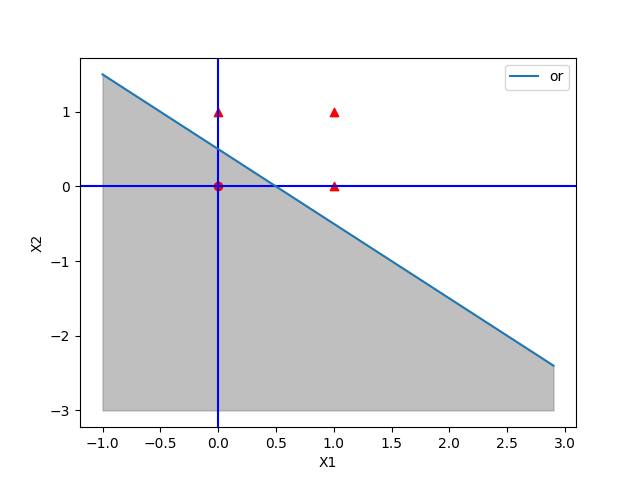

In [20]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\밑바닥부터 시작하는 딥러닝1\\밑시딥1 - 2장\\images\\fig 2-6.png")

OR 게이트는 $(x_1, x_2) = (0, 0)$일 때 0을 출력하고 $(0, 1), (1, 0), (1, 1)$일 때는 1을 출력한다. 그림에서는 0을 원$(\circ)$, 1을 삼각형$( \triangle)$ 으로 표시하였다. OR 게이트를 만들려면 [그림2-6]의 $\circ$과 $\triangle$을 직선으로 나눠야 한다. 실제로 이 그림의 직선은 네 점을 제대로 나누고 있다.

그럼 XOR 게이트의 경우는 어떨까? OR 게이트 때처럼 직선 하나로 $\circ$과 $\triangle$을 나누는 영역을 만들어낼 수 있을까?

#### [그림 2-7]

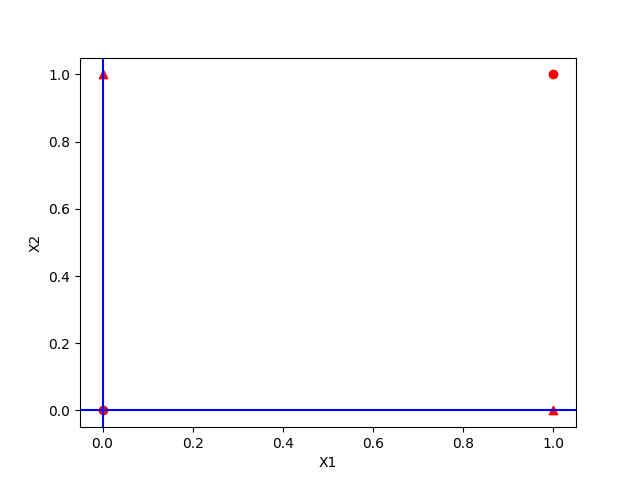

In [21]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\밑바닥부터 시작하는 딥러닝1\\밑시딥1 - 2장\\images\\fig 2-7.png")

[그림 2-7]의 $\circ$과 $\triangle$ 을 직선 하나로 나누는 방법은 아무리 생각해도 떠오르지 않는다. 사실 직선 하나로 나누기란 불가능한다.

### 2.4.2 선형과 비선형
직선 하나로는 [그림2-7]의 $\circ$과 $\triangle$을 나눌 수 없다. 하지만 '직선'이라는 제약을 없앤다면 가능하지 않을까? 예를 들어 [그림2-8]처럼 나눌 수 있다.

#### [그림2-8]

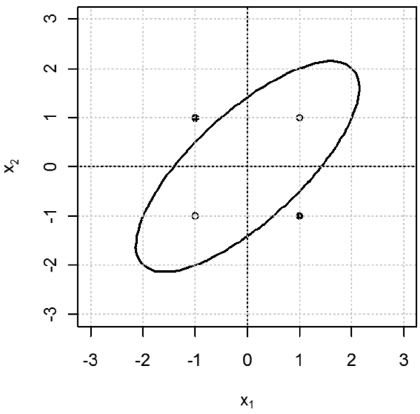

In [22]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\밑바닥부터 시작하는 딥러닝1\\밑시딥1 - 2장\\images\\fig 2-8.png")

퍼셉트론은 직선 하나로 나눈 영역만 표현할 수 있따는 한계가 있다. [그림2-8] 같은 곡선은 표현할 수 없다는 것이다. 덧붙여서 [그림2-8]과 같은 곡선의 영역을 $\scriptsize \textbf{비선형}$ 영역, 직선의 영역을 $\scriptsize \textbf{선형}$ 이라고 한다. 선형, 비선형이라는 말은 기계학습 분야에서 자주 쓰이는 용어로, [그림2-6]과 [그림2-8] 같은 이미지를 떠올리면 된다.

## 2.5 다층 퍼셉트론이 출동한다면
안타깝게도 퍼셉트론으로는 XOR 게이트를 표현할 수 없다. 그렇다고 슬퍼할 필요는 없다. 사실 퍼셉트론의 아름다움은 '층을 쌓아' $\scriptsize \textbf{다층 퍼셉트론}^{\text{multi-layer perceptron}}$을 만들 수 있다는 데 있다. 이번 절에서는 층을 하나 더 쌓아서 XOR을 표현해 볼 것이다. '층을 쌓는다'는 말의 뜻은 잠시 뒤에 살펴보기로 하고, 우선은 XOR 게이트 문제를 다른 관점에서 생각해보기로 하자.

### 2.5.1 기존 게이트 조합하기
XOR 게이트를 만드는 방법은 다양하다. 그중 하나는 앞서 만든 AND, NAND, OR 게이트를 조합하는 방법이다. 여기에서는 AND, NAND, OR 게이트를 [그림2-9]와 같은 기호로 표기한다. 참고로 [그림2-9]의 NAND 게이트 출력부에 있는 $\circ$기호는 출력을 반전한다는 뜻이다.

#### [그림2-9] AND, NAND, OR 게이트 기호

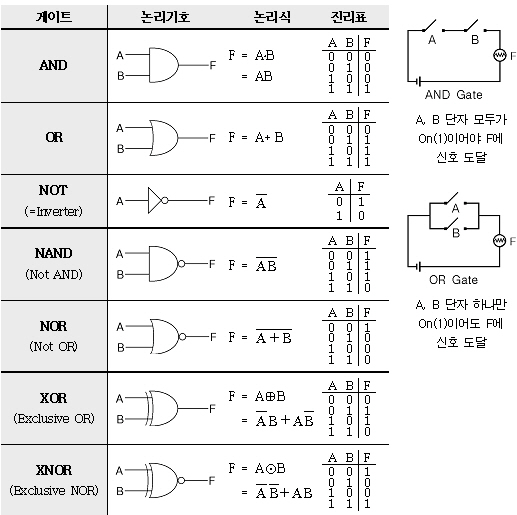

In [23]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\밑바닥부터 시작하는 딥러닝1\\밑시딥1 - 2장\\images\\fig 2-9.jpeg")

[그림 2-10]과 같은 조합이라면 XOR 게이트를 구현할 수 있따. $x_1$과 $x_2$가 입력 신호, $y$가 출력 신호이다. $x_1$과 $x_2$는 NAND와 OR 게이트의 입력이 되고, NAND와 OR의 출력이 AND 게이트의 입력으로 이어진다.

#### [그림2-10] AND, NAND, OR 게이트를 조합해 구현한 XOR 게이트

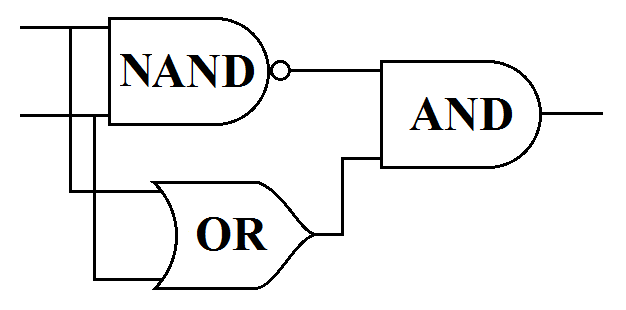

In [24]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\밑바닥부터 시작하는 딥러닝1\\밑시딥1 - 2장\\images\\fig 2-10.png")

$\textbf{NOTE}$     
앞 절에서 말한 퍼셉트론의 한계는 정확히 말하면 '$\scriptsize \textbf{단층 퍼셉트론}^{\text{single-layer perceptron}}$으로는 XOR 게이트를 표현할 수 없다' 또는 '단층 퍼셉트론으로는 비선형 영역을 분리할 수 없다'가 된다. 앞으로는 퍼셉트론을 조합하여, 즉 층을 쌓아서 XOR 게이트를 구현하는 모습을 보게 된다.

그럼 [그림2-10]의 조합이 정말 XOR을 구현하는지 살펴보도록 하자. NAND의 출력을 $s_1$, OR의 출력을 $s_2$로 해서 진리표를 만들면 [그림2-11]처럼 된다. $x_1, x_2, y$에 주목하면 분명히 XOR의 출력과 같다.

#### [그림 2-11] XOR 게이트의 진리표

| x1 | x2 | s1 | s2 | y |
|----|----|----|----|---|
|  0 |  0 |  1 |  0 | 0 |
|  1 |  0 |  1 |  1 | 1 |
|  0 |  1 |  1 |  1 | 1 |
|  1 |  1 |  0 |  1 | 0 |

### 2.5.2 XOR 게이트 구현하기
이어서 [그림 2-10] 처럼 조합된 XOR 게이트를 파이썬으로 구현해보자. 지금까지 정의한 함수 AND, NAND, OR을 사용하면 다음과 같이 (쉽게!) 구현할 수 있다.

In [25]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

이 XOR 함수는 기대한 대로의 결과를 출력한다.

In [26]:
print(XOR(0, 0)) # 0을 출력
print(XOR(1, 0)) # 1을 출력
print(XOR(0, 1)) # 1을 출력
print(XOR(1, 1)) # 0을 출력

0
1
1
0


이로써 XOR 게이트를 완성했다. 지금 구현한 XOR을 뉴런을 이용한 퍼셉트론으로 표현하면 [그림2-12]처럼 된다.

#### [그림2-12] XOR의 퍼셉트론

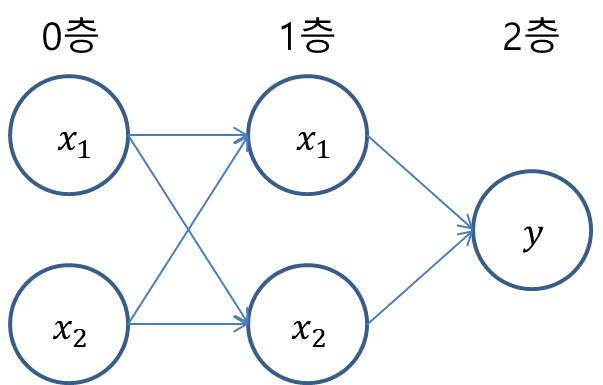

In [27]:
Image.open("C:\\Users\\SAMSUNG\\Downloads\\밑바닥부터 시작하는 딥러닝1\\밑시딥1 - 2장\\images\\fig 2-12.png")

XOR은 [그림2-12]와 같은 다층 구조의 네트워크이다. 이 책에서는 왼쪽부터 차례로 0층, 1층, 2층이라고 부르도록 하자.

그런데 [그림2-12]의 퍼셉트론은 지금까지 본 AND, OR 퍼셉트론(그림2-1)과 형태가 다르다. 실제로 AND, OR이 단층 퍼셉트론인 데 반해, XOR은 2층 퍼셉트론이다. 이처럼 층이 여러 개인 퍼셉트론을 다층 퍼셉트론이라 한다.

$\textbf{NOTE}$     
[그림2-12]의 퍼셉트론은 모두 3층으로 구성되지만, 가중치를 갖는 층은 사실상 2개(0층과 1층 사이, 1층과 2층 사이)뿐이니 '2층 퍼셉트론'이라 부르기로 하자.(참고로 Andrew Ng도 이러한 표기를 사용한다.) 문헌에 따라서는 구성 층의 수를 기준으로 '3층 퍼셉트론'이라 하는 경우도 있다.

[그림2-12]와 같은 2층 퍼셉트론에서는 0층에서 1층으로 신호가 전달되고, 이어서 1층에서 2층으로 신호가 전달된다. 이 동작을 좀 더 자세히 서술하면 다음과 같다.

1. 0층의 두 뉴런이 입력 신호를 받아 1층의 뉴런으로 신호를 보낸다.
2. 1층의 뉴런이 2층의 뉴런으로 신호를 보내고, 2층의 뉴런은 $y$를 출력한다.

덧붙여서, 이 2층 퍼셉트론의 동작을 공장의 조립라인에 비유할 수 있다. 1단(1층째) 작업자는 흘러오는 '부품'을 다듬어 일이 완료되면 2단(2층째) 작업자에게 건네준다. 2단의 작업자는 1단 작업자로부터 전달받은 '부품'을 다듬어 완성품으로 출하(출력)한다. 이처럼 XOR 게이트 퍼셉트론에서는 작업자들 사이에서 $\scriptsize\textbf{부품을 전달}$하는 일이 이뤄진다.

이상으로 2층 구조를 사용해 퍼셉트론으로 XOR 게이트를 구현할 수 있게 되었다. 다시 말해 $\scriptsize\textbf{단층 퍼셉트론으로는 표현하지 못한 것을 층을 하나 늘려 구현}$할 수 있었다. 이처럼 퍼셉트론은 층을 쌓아(깊게 하여) 더 다양한 것을 표현할 수 있는 것이다.

## 2.6 NAND에서 컴퓨터까지

다층 퍼셉트론은 지금까지 보아온 회로보다 더 복잡한 회로를 만들 수 있다. 예를 들면, 덧셈을 처리하는 가산기도 만들 수 있다. 2진수를 10진수로 변환하는 인코더, 어떤 조건을 충족하면 1을 출력하는 회로(패리티 검사 회로)도 퍼셉트론으로 표현할 수 있다. 사실은 퍼셉트론을 이용하면 '컴퓨터'마저 표현할 수 있다.

컴퓨터는 정보를 처리하는 기계이다. 컴퓨터에 무언가를 입력하면 정해진 방법으로 처리하고 그 결과를 출력한다. 정해진 방법으로 처리한다는 것은 컴퓨터도 마치 퍼셉트론처럼 입력과 출력으로 구성된 특정 규칙대로 계산을 수행한다는 뜻이다.

컴퓨터 내부에서 이뤄지는 처리가 매우 복잡할 거 같지만, 사실은 (놀랍게도)NAND 게이트의 조합만으로 컴퓨터가 수행하는 일을 재현할 수 있다. NAND 게이트만으로 컴퓨터를 만들 수 있다? 이 말은 곧 퍼셉트론으로도 컴퓨터를 표현할 수 있다는 놀라운 사실로 이어진다. 지금까지 살펴본 것처럼 NAND 게이트는 퍼셉트론으로 만들 수 있기 때문이다.

이처럼 다층 퍼셉트론은 컴퓨터도 만들 정도로 복잡한 표현을 해낸다. 놀랍지 않은가? 그럼 어떤 구조의 퍼셉트론이면 컴퓨터를 표현할 수 있을까? 층을 얼마나 깊게 하면 컴퓨터가 만들어질까?    

그 답은 '이론상 2층 퍼셉트론이면 컴퓨터를 만들 수 있다'이다. 말도 안 되는 소리 같지만, 2층 퍼셉트론, 정확히는 비선형인 시그모이드 함수를 활성화 함수로 이용하면 임의의 함수를 표현할 수 있다는 사실이 증명되었다.(3장 참고) 그러나 2층 퍼셉트론 구조에서 가중치를 적절히 설정하여 컴퓨터를 만들기란 너무 어렵다. 실제로도 NAND 등의 저수준 소자에서 시작하여 컴퓨터를 만드는데 필요한 부품(모듈)을 단계적으로 만들어가는 쪽이 자연스러운 방법이다. 즉, 처음에는 AND와 OR 게이트, 그 다음에는 반가산기와 전가산기, 그 다음에는 산술 논리 연산 장치(ALU), 그 다음에는 CPU라는 식이다. 그래서 퍼셉트론으로 표현하는 컴퓨터도 여러 층을 다시 층층이 겹친 구조로 만드는 방향이 자연스러운 흐름이다.  

이 책에서는 컴퓨터를 만들지 않는다. 그래도 퍼셉트론은 층을 거듭 쌓으면 비선형적인 표현도 가능하고, 이론상 컴퓨터가 수행하는 처리도 모두 표현할 수 있다는 점을 기억하도록 한다.

## 2.7 정리
이번 장에서는 퍼셉트론을 배웠다. 퍼셉트론은 간단한 알고리즘이라 그 구조를 쉽게 이해할 수 있다. 퍼셉트론은 다음 장에서 배울 신경망의 기초가 된다. 그러니 이번 장에서 배운 내용은 아주 중요하다고 할 수 있겠다.

#### 이번 장에서 배운 내용
- 퍼셉트론은 입출력을 갖춘 알고리즘이다. 입력을 주면 정해진 규칙에 따른 값을 출력한다.
- 퍼셉트론에서는 '가중치'와 '편향'을 매개변수로 설정한다.
- 퍼셉트론으로는 AND, OR 게이트 등의 논리 회로를 표현할 수 있다.
- XOR 게이트는 단층 퍼셉트론으로는 표현할 수 없다.
- 2층 퍼셉트론을 이용하면 XOR 게이트를 표현할 수 있다.
- 단층 퍼셉트론은 직선형 영역만 표현할 수 있고, 다층 퍼셉트론은 비선형 영역도 표현할 수 있다.
- 다층 퍼셉트론은 (이론상) 컴퓨터를 표현할 수 있다.

*출처

이미지 출처 1 : http://makething.tistory.com/entry/9%EC%9B%94-%EB%85%BC%EB%A6%AC%EA%B2%8C%EC%9D%B4%ED%8A%B8

이미지 출처 2 : http://www.minecraftforum.net/forums/minecraft-discussion/redstone-discussion-and/341894-xor-gate-with-2-and-1-not-1-or

이미지 출처 3 : https://www.researchgate.net/figure/255786872_fig8_Figure-9-Boundary-decision-for-a-nonlinear-classifier-solving-the-bipolar-XOR-problem

이미지 출처 4 : https://github.com/paulseo0827/deeplearning/tree/master/CH2.Perceptron